In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
train_data = pd.read_csv("C:\\Users\\MAHE\\Desktop\\data_sets\\House-prices\\train.csv")
test_data = pd.read_csv("C:\\Users\\MAHE\\Desktop\\data_sets\\House-prices\\test.csv")
train_test_data = [train_data, test_data]

## Explore Data

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### there are 1460 rows 
### how many are nulls in train data?

In [3]:
#finding no of null values and the column name which contains null value
print("no of null values in each column of train set is\n",train_data.isna().sum())
nan_val= []
for i in train_data.columns:
    if(train_data[i].isna().sum() > 1000):
        nan_val.append(i)
print("\nno of columns with null values are\n",len(nan_val))      

no of null values in each column of train set is
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
Gara

<b>we have <u>19</u> columns with null values and their name can be found in list nan_val,out of which 4 have more than 1000 null values and it is better to drop them  


### how many are nulls in train data?

In [4]:
print("no of null values in each column of train set is\n",train_data.isna().sum())
nan_val= []
for i in test_data.columns:
    if(test_data[i].isna().sum() > 1000):
        nan_val.append(i)
print("\nno of columns with null values are\n",len(nan_val))   

no of null values in each column of train set is
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
Gara

<b>we have <u>33</u> columns with null values and their name can be found in list nan_val,out of which 4 have more than 1000 null values and it is better to drop them  


In [5]:
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum() >1000):
        nan_val1.append(i)
#print("\nno of columns with null values are\n",len(nan_val1))    
print(nan_val1)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
train_data.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace = True)
test_data.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace = True)

In [7]:
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<500 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [8]:
#for dataset in train_test_data:
#print(test_data['MasVnrType'].mode(),'\n')
#print(train_data.groupby('MasVnrType')['MasVnrArea'].mean())
#print(test_data.groupby('MasVnrType')['MasVnrArea'].mean())
train_data['MasVnrType'].fillna("None",inplace = True)
test_data['MasVnrType'].fillna("None",inplace = True)

In [9]:
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [10]:
train_data['MasVnrArea'].fillna(train_data.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace = True)
test_data['MasVnrArea'].fillna(train_data.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace = True)

In [11]:
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [12]:
#quality = train_data[['PavedDrive','SalePrice']]
#quality.groupby('PavedDrive').mean().plot.bar()
#print(quality.groupby('PavedDrive').mean())

In [13]:
re = train_data.corr()
re['LotFrontage']

Id              -0.010601
MSSubClass      -0.386347
LotFrontage      1.000000
LotArea          0.426095
OverallQual      0.251646
OverallCond     -0.059213
YearBuilt        0.123349
YearRemodAdd     0.088866
MasVnrArea       0.192419
BsmtFinSF1       0.233633
BsmtFinSF2       0.049900
BsmtUnfSF        0.132644
TotalBsmtSF      0.392075
1stFlrSF         0.457181
2ndFlrSF         0.080177
LowQualFinSF     0.038469
GrLivArea        0.402797
BsmtFullBath     0.100949
BsmtHalfBath    -0.007234
FullBath         0.198769
HalfBath         0.053532
BedroomAbvGr     0.263170
KitchenAbvGr    -0.006069
TotRmsAbvGrd     0.352096
Fireplaces       0.266639
GarageYrBlt      0.070250
GarageCars       0.285691
GarageArea       0.344997
WoodDeckSF       0.088521
OpenPorchSF      0.151972
EnclosedPorch    0.010700
3SsnPorch        0.070029
ScreenPorch      0.041383
PoolArea         0.206167
MiscVal          0.003368
MoSold           0.011200
YrSold           0.007450
SalePrice        0.351799
Name: LotFro

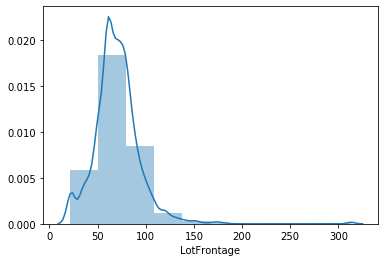

In [14]:
A=train_data.LotFrontage
Anan=A[~np.isnan(A)] # Remove the NaNs

sns.distplot(Anan,hist=True,bins = 10)

In [15]:
train_data['LotFrontage'].fillna(train_data.LotFrontage.mean(),inplace = True)
test_data['LotFrontage'].fillna(train_data.LotFrontage.mean(),inplace = True)

In [16]:
print(train_data['LotFrontage'].isna().sum())
print(test_data['LotFrontage'].isna().sum())

0
0


In [17]:
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [18]:
print(train_data['BsmtQual'].value_counts())
print(test_data['BsmtQual'].value_counts())
train_data.BsmtQual.mode()[0]

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


'TA'

In [19]:
train_data['BsmtQual'].fillna('None',inplace = True)
test_data['BsmtQual'].fillna('None',inplace = True)

In [20]:
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [21]:
print(train_data['BsmtCond'].value_counts())
print(test_data['BsmtCond'].value_counts())
train_data['BsmtCond'].fillna("None",inplace = True)
test_data['BsmtCond'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64
['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [22]:
print(train_data['BsmtExposure'].value_counts())
print(test_data['BsmtExposure'].value_counts())
train_data['BsmtExposure'].fillna("None",inplace = True)
test_data['BsmtExposure'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64
['BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [23]:
print(train_data['BsmtFinType2'].value_counts())
print(test_data['BsmtFinType2'].value_counts())
train_data['BsmtFinType2'].fillna("None",inplace = True)
test_data['BsmtFinType2'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64
['BsmtFinType1', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [24]:
print(train_data['Electrical'].value_counts())
print(test_data['Electrical'].value_counts())
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace = True)
test_data['Electrical'].fillna(test_data['Electrical'].mode()[0],inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64
['BsmtFinType1', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [25]:
print(train_data['GarageType'].value_counts())
print(test_data['GarageType'].value_counts())
train_data['GarageType'].fillna("None",inplace = True)
test_data['GarageType'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64
['BsmtFinType1', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [26]:
print(train_data['GarageYrBlt'].value_counts())
print(test_data['GarageYrBlt'].value_counts())
train_data['GarageYrBlt'].fillna(0,inplace = True)
test_data['GarageYrBlt'].fillna(0,inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
2008.0    32
1977.0    31
2000.0    28
1993.0    27
1950.0    27
2002.0    27
1998.0    27
1956.0 

In [27]:
print(train_data['GarageFinish'].value_counts())
print(test_data['GarageFinish'].value_counts())
train_data['GarageFinish'].fillna("None",inplace = True)
test_data['GarageFinish'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64
['BsmtFinType1', 'GarageQual', 'GarageCond']


In [28]:
print(train_data['GarageQual'].value_counts())
print(test_data['GarageQual'].value_counts())
train_data['GarageQual'].fillna("None",inplace = True)
test_data['GarageQual'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64
['BsmtFinType1', 'GarageCond']


In [29]:
print(train_data['GarageCond'].value_counts())
print(test_data['GarageCond'].value_counts())
train_data['GarageCond'].fillna("None",inplace = True)
test_data['GarageCond'].fillna("None",inplace = True)
nan_val1= []
for i in test_data.columns:
    if(train_data[i].isna().sum()<300 and train_data[i].isna().sum()!=0 ):
        nan_val1.append(i)
print(nan_val1)

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64
['BsmtFinType1']


In [30]:
print(train_data['BsmtFinType1'].value_counts())
print(test_data['BsmtFinType1'].value_counts())
train_data['BsmtFinType1'].fillna("None",inplace = True)
test_data['BsmtFinType1'].fillna("None",inplace = True)
nan_val1= []


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [31]:
for i in test_data.columns:
    if(train_data[i].isna().sum()>300):
        nan_val1.append(i)
print(nan_val1)

['FireplaceQu']


In [32]:
train_data['FireplaceQu'].fillna("None",inplace = True)
test_data['FireplaceQu'].fillna("None",inplace = True)

In [33]:
nan_val1 = []
for i in train_data.columns:
    if(train_data[i].isna().sum()>50):
        nan_val1.append(i)
print(nan_val1)

[]


In [34]:
import seaborn as sns

In [35]:
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isnull().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [36]:
re['GarageCars']

Id               0.016570
MSSubClass      -0.040110
LotFrontage      0.285691
LotArea          0.154871
OverallQual      0.600671
OverallCond     -0.185758
YearBuilt        0.537850
YearRemodAdd     0.420622
MasVnrArea       0.361967
BsmtFinSF1       0.224054
BsmtFinSF2      -0.038264
BsmtUnfSF        0.214175
TotalBsmtSF      0.434585
1stFlrSF         0.439317
2ndFlrSF         0.183926
LowQualFinSF    -0.094480
GrLivArea        0.467247
BsmtFullBath     0.131881
BsmtHalfBath    -0.020891
FullBath         0.469672
HalfBath         0.219178
BedroomAbvGr     0.086106
KitchenAbvGr    -0.050634
TotRmsAbvGrd     0.362289
Fireplaces       0.300789
GarageYrBlt      0.588920
GarageCars       1.000000
GarageArea       0.882475
WoodDeckSF       0.226342
OpenPorchSF      0.213569
EnclosedPorch   -0.151434
3SsnPorch        0.035765
ScreenPorch      0.050494
PoolArea         0.020934
MiscVal         -0.043080
MoSold           0.040522
YrSold          -0.039117
SalePrice        0.640409
Name: Garage

In [37]:
train_data['GarageArea'].fillna(0,inplace = True)
test_data['GarageArea'].fillna(0,inplace = True)

In [38]:
a=(test_data.groupby('GarageArea')['GarageCars'].min())
b=(test_data.groupby('GarageArea')['GarageCars'].max())
c=(test_data.groupby('GarageArea')['GarageCars'].mean())
print(a,b,c)
#sns.distplot(test_data['GarageArea'])

GarageArea
0.0       0.0
100.0     1.0
160.0     1.0
162.0     1.0
164.0     1.0
180.0     1.0
184.0     1.0
185.0     1.0
195.0     1.0
200.0     1.0
205.0     1.0
207.0     1.0
209.0     1.0
210.0     1.0
215.0     1.0
216.0     1.0
217.0     1.0
220.0     1.0
224.0     1.0
225.0     1.0
226.0     1.0
228.0     1.0
230.0     1.0
231.0     1.0
234.0     1.0
240.0     1.0
242.0     1.0
246.0     1.0
249.0     1.0
250.0     1.0
         ... 
932.0     3.0
933.0     3.0
938.0     3.0
944.0     2.0
949.0     3.0
958.0     3.0
959.0     3.0
962.0     3.0
963.0     3.0
972.0     3.0
984.0     3.0
1003.0    3.0
1008.0    3.0
1017.0    4.0
1040.0    3.0
1041.0    4.0
1085.0    3.0
1092.0    3.0
1105.0    2.0
1110.0    3.0
1138.0    3.0
1150.0    4.0
1154.0    3.0
1174.0    3.0
1184.0    5.0
1200.0    3.0
1231.0    3.0
1314.0    4.0
1348.0    3.0
1488.0    4.0
Name: GarageCars, Length: 459, dtype: float64 GarageArea
0.0       0.0
100.0     1.0
160.0     1.0
162.0     1.0
164.0     1.0
180.0   

In [39]:
test_data['GarageCars'].fillna(test_data.groupby('GarageArea')['GarageCars'].transform('mean'),inplace = True)

In [40]:
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']


In [41]:
test_data.Exterior1st.fillna(test_data.Exterior1st.mode()[0],inplace = True)


In [42]:
test_data.Exterior2nd.fillna(test_data.Exterior2nd.mode()[0],inplace = True)
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['MSZoning', 'Utilities', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']


In [43]:
(test_data.BsmtFinSF1.fillna(0,inplace = True))
(test_data.BsmtFinSF2.fillna(0,inplace = True))

In [44]:
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['MSZoning', 'Utilities', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']


In [45]:
test_data.KitchenQual.fillna(test_data.KitchenQual.mode()[0],inplace = True)
test_data.KitchenQual.value_counts()

TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [46]:
test_data.MSZoning.fillna(test_data.MSZoning.mode()[0],inplace = True)
test_data.MSZoning.isna().sum()

0

In [47]:
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['Utilities', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType']


In [48]:
test_data.Utilities.fillna("AllPub",inplace = True)
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType']


In [49]:
test_data.TotalBsmtSF.fillna(test_data.TotalBsmtSF.mean(),inplace = True)
test_data.Functional.fillna("Typ",inplace = True)
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

['BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'SaleType']


In [50]:
print(test_data.BsmtUnfSF.mean())
test_data.BsmtUnfSF.fillna(0,inplace= True)
nan_val1 = []
for i in test_data.columns:
    if(test_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

554.2949245541838
['BsmtFullBath', 'BsmtHalfBath', 'SaleType']


In [51]:
test_data.BsmtHalfBath.fillna(0.0,inplace = True)
test_data.BsmtFullBath.fillna(0.0,inplace=True)
test_data.SaleType.fillna(test_data.SaleType.mode()[0],inplace=True)

In [52]:
nan_val1 = []
for i in train_data.columns:
    if(train_data[i].isna().sum()>0):
        nan_val1.append(i)
print(nan_val1)

[]


In [53]:
colsn=[]  
for i in test_data.columns:
    if(test_data[i].dtype == 'object'):
        colsn.append(i)
len(colsn)


39

In [54]:
test_data.shape

(1459, 76)

In [55]:
train_data.shape

(1460, 77)

## Encoding

In [56]:
from sklearn import preprocessing

In [57]:
train_copy = train_data.copy()
test_copy = test_data.copy()
enc = pd.concat([train_copy,test_copy],sort = False)
enc.shape

(2919, 77)

In [58]:
"""l = ['a','b','s','a']
le = preprocessing.LabelEncoder()
le.fit(l)
list(le.transform(l))
l = []
for i in test_data['SaleType']:
    l.append(i)
y = list(le.fit_transform(l))"""

"l = ['a','b','s','a']\nle = preprocessing.LabelEncoder()\nle.fit(l)\nlist(le.transform(l))\nl = []\nfor i in test_data['SaleType']:\n    l.append(i)\ny = list(le.fit_transform(l))"

In [59]:
le = preprocessing.LabelEncoder()
for i in colsn:
    v =[]
    for j in enc[i]:
        v.append(j)
    
    enc[i].replace(v,list(le.fit_transform(v)),inplace = True)

In [60]:
enc.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
                  ...   
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64


In [61]:
train_df = enc.iloc[:1460, :]
test_df = enc.iloc[1460:,:]

In [62]:
train_df.shape

(1460, 77)

In [63]:
test_df.drop('SalePrice',axis = 1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [65]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import linear_model
xtrain = train_df.drop(['SalePrice'],axis = 1)
ytrain = train_df['SalePrice']

In [66]:
rfc = RandomForestRegressor(n_estimators=900)
rfc.fit(xtrain,ytrain)
y_pred = rfc.predict(test_df)
y_pred

array([125613.63555556, 154993.33      , 178984.83888889, ...,
       149783.16      , 111126.21      , 230183.62222222])

In [73]:
import xgboost
regressor=xgboost.XGBRegressor()


from sklearn.model_selection import RandomizedSearchCV


booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   41.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  8.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=regressor,
            param_grid=hyperparameter_grid,
            cv=2, 
            scoring = 'neg_mean_absolute_error',n_jobs = 100,
            verbose = 5, 
            return_train_score = True,
            )
grid_cv.fit(xtrain,ytrain)

Fitting 2 folds for each of 3200 candidates, totalling 6400 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
Exception in thread QueueManagerThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 615, in _queue_management_worker
    ready = wait(readers + worker_sentinels)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 868, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 800, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 101



In [75]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [76]:
cl = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
cl.fit(xtrain,ytrain)
y_pred2 = cl.predict(test_df)
y_pred2

[00:04:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([126797.05, 170231.19, 185010.52, ..., 169372.16, 105955.24,
       228982.03], dtype=float32)

In [68]:
#Linear Regression
lm = linear_model.LinearRegression()
model = lm.fit(xtrain,ytrain)
y_pred3 = lm.predict(test_df)
y_pred3+20000

array([123316.93647982, 171395.2416    , 184131.82334646, ...,
       159502.63592388, 142187.72185643, 263099.45859851])

In [1]:
#for i in colsn:
 #   print(train_df[i].value_counts())

In [78]:
subb = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": y_pred2
    })
subb.to_csv('house_pricev1.csv', index=False)

In [71]:
#remove utilities 